In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

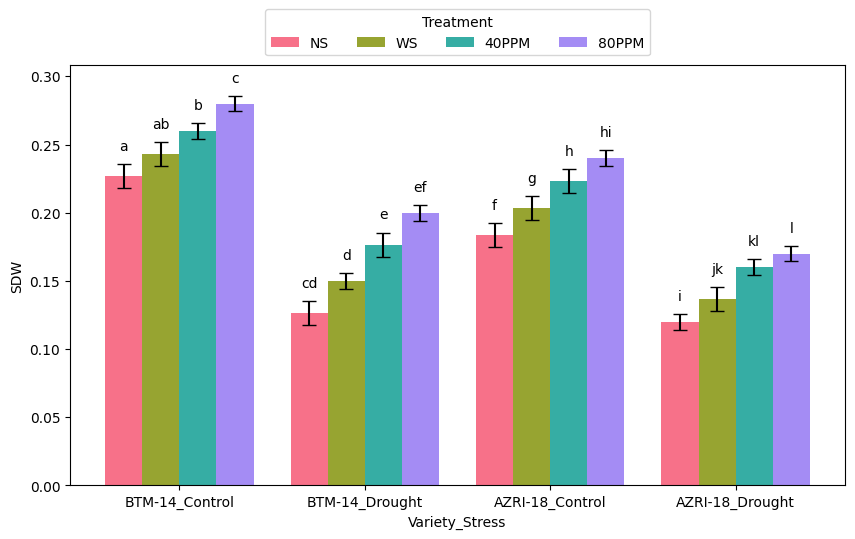

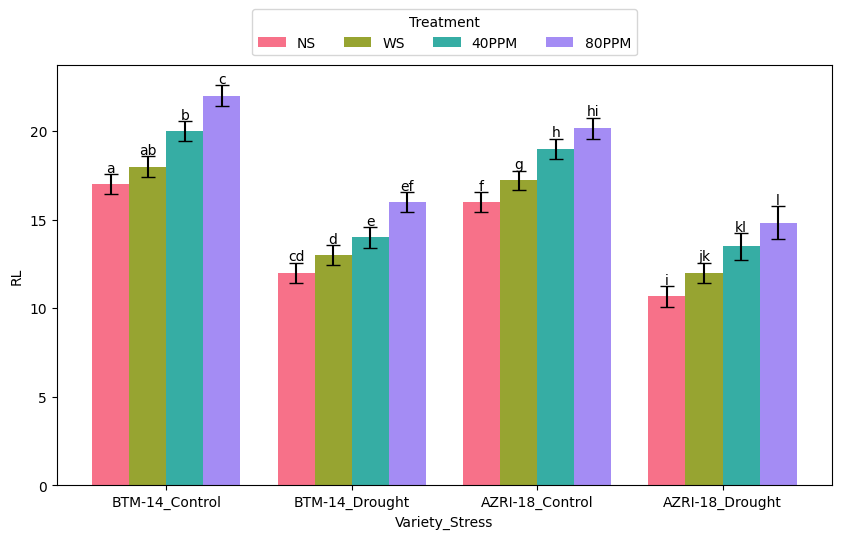

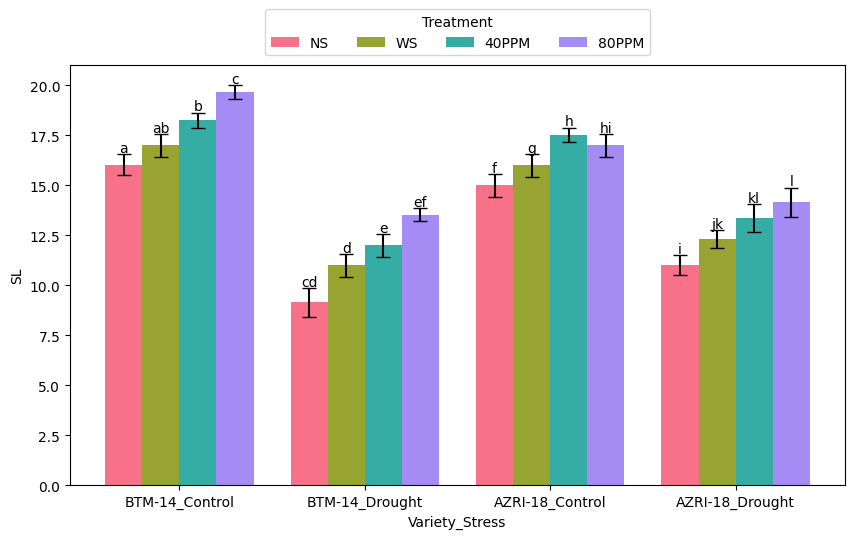

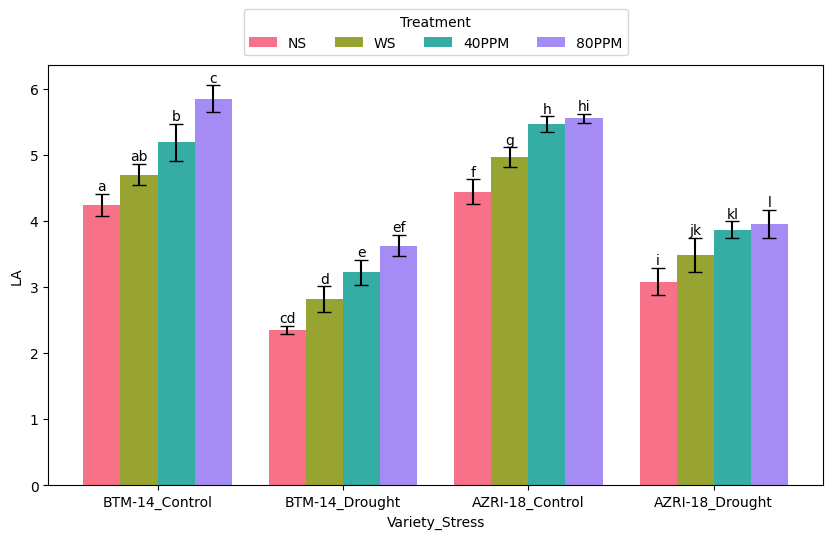

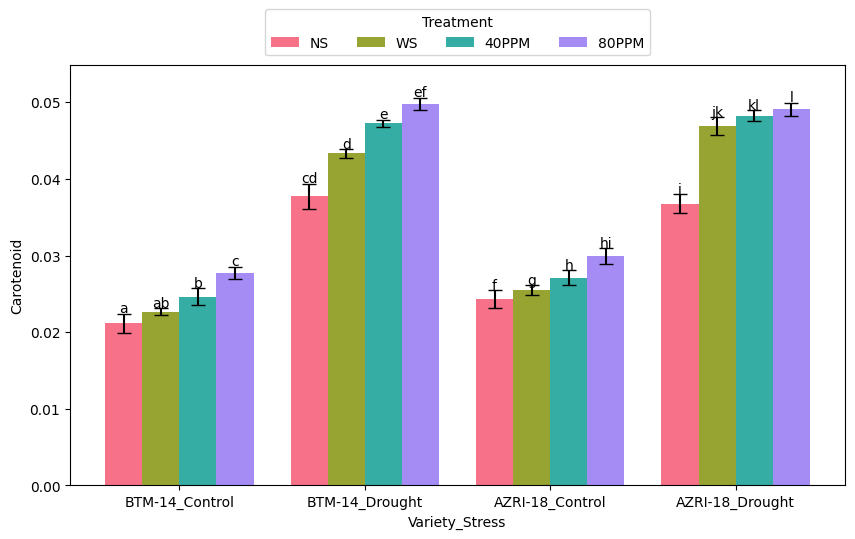

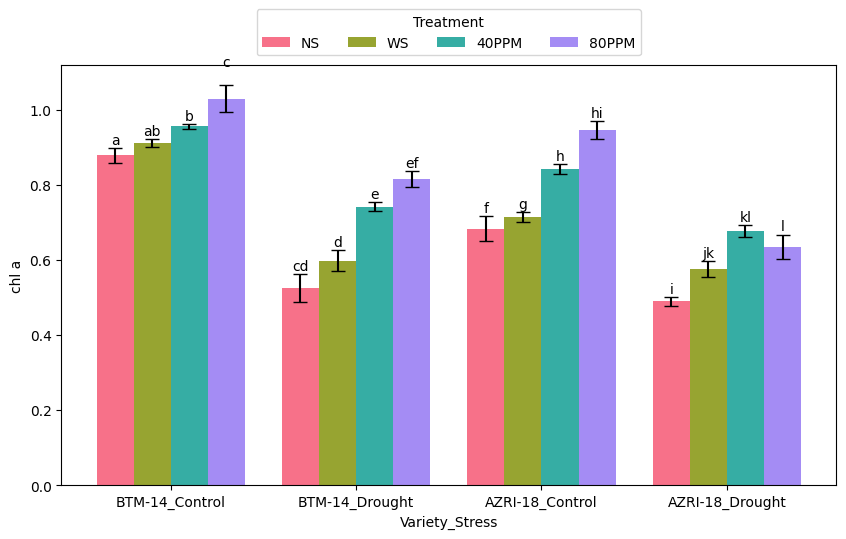

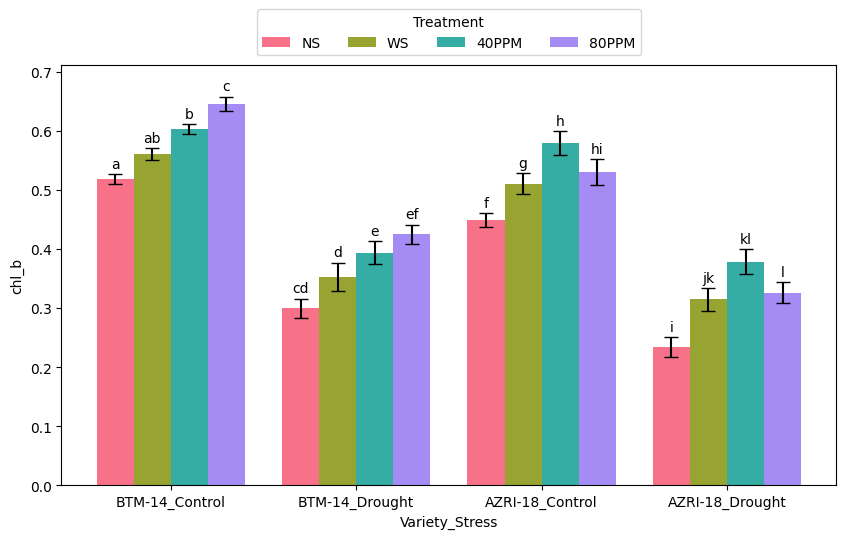

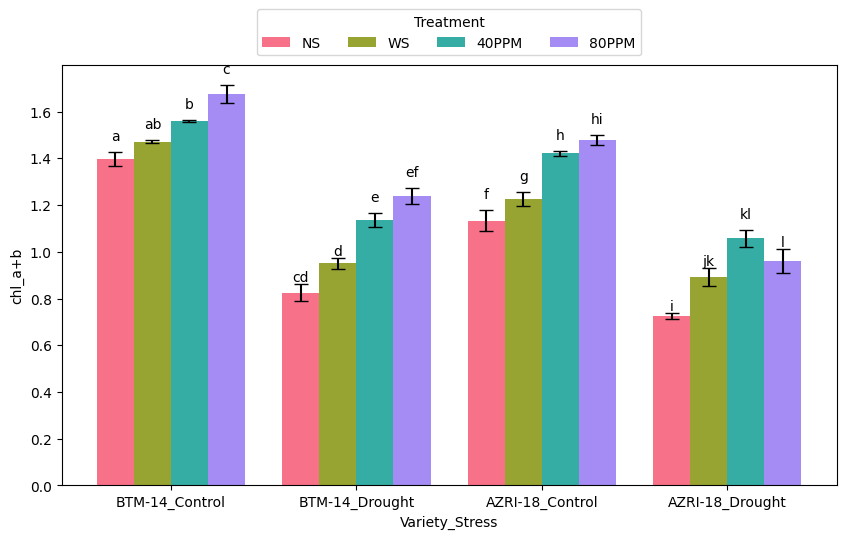

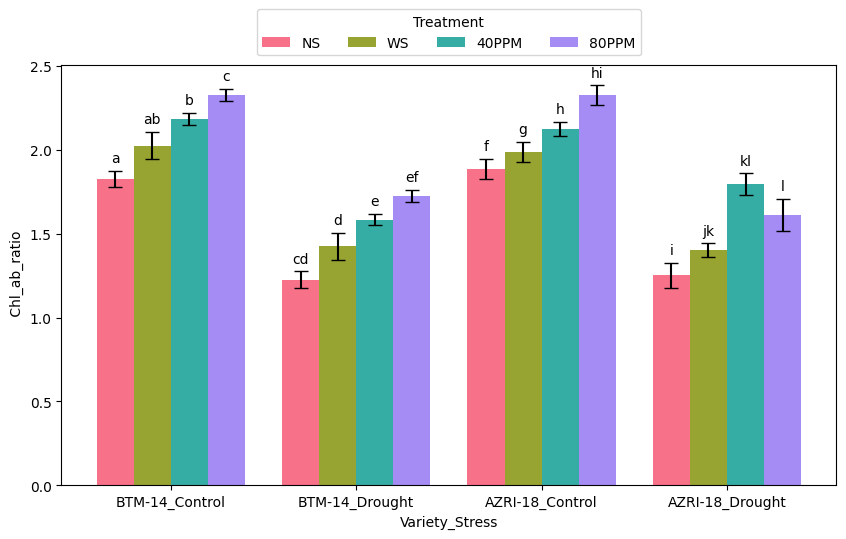

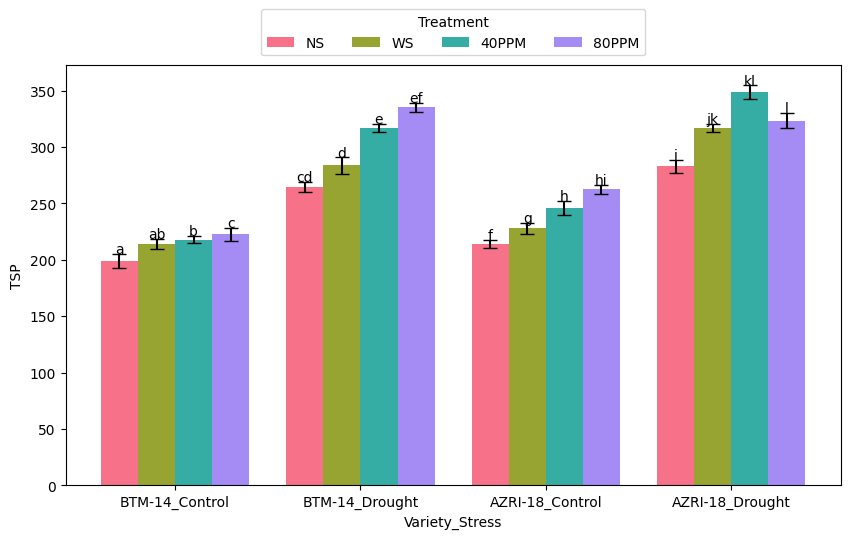

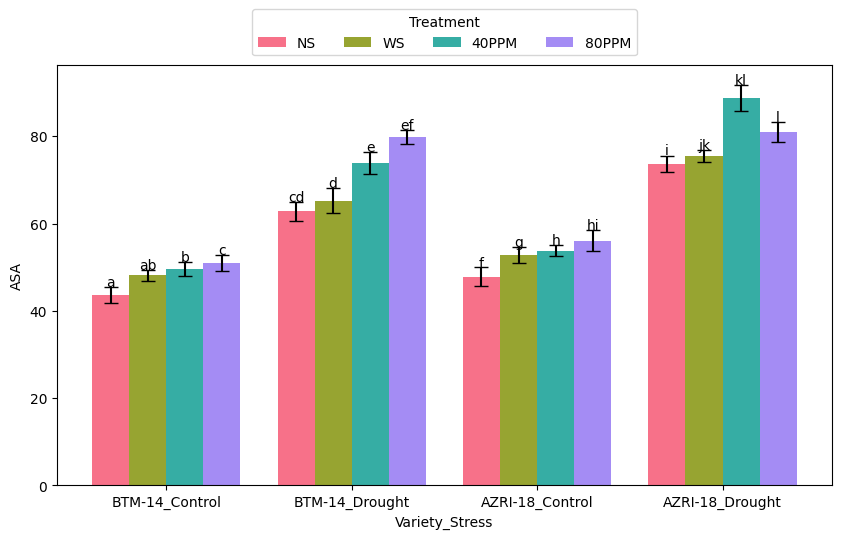

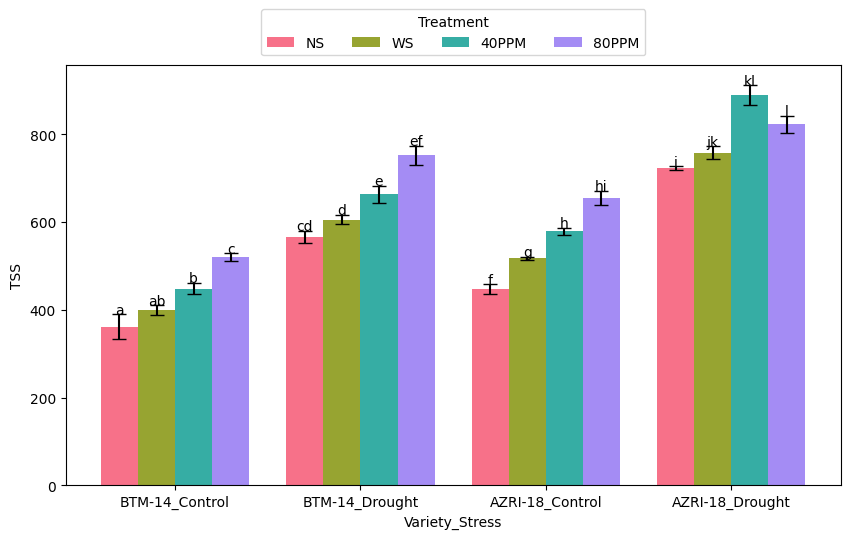

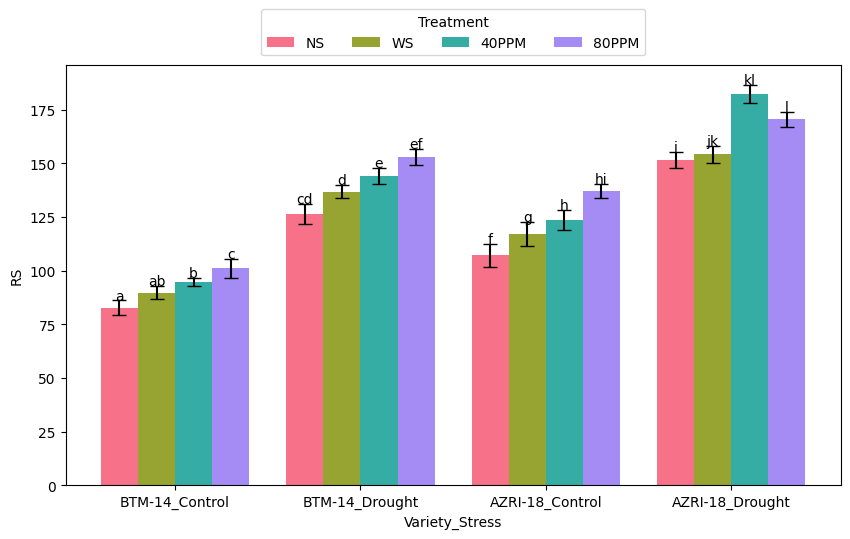

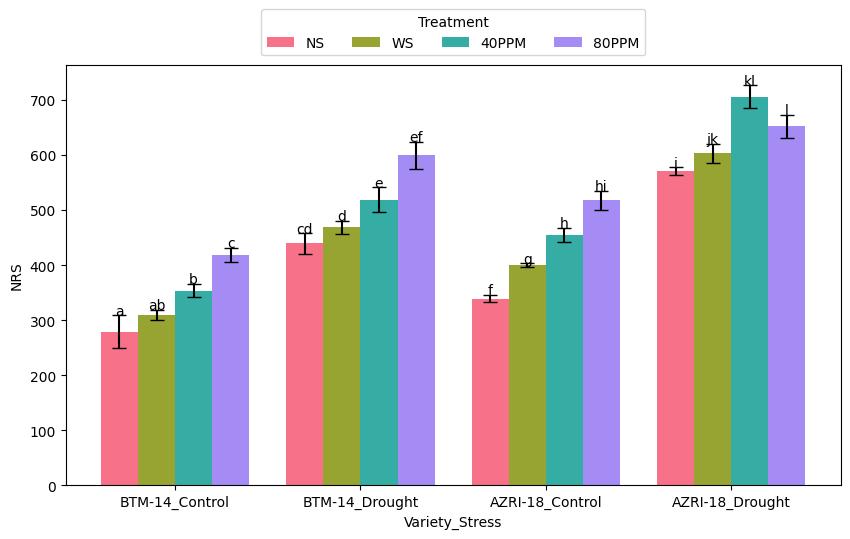

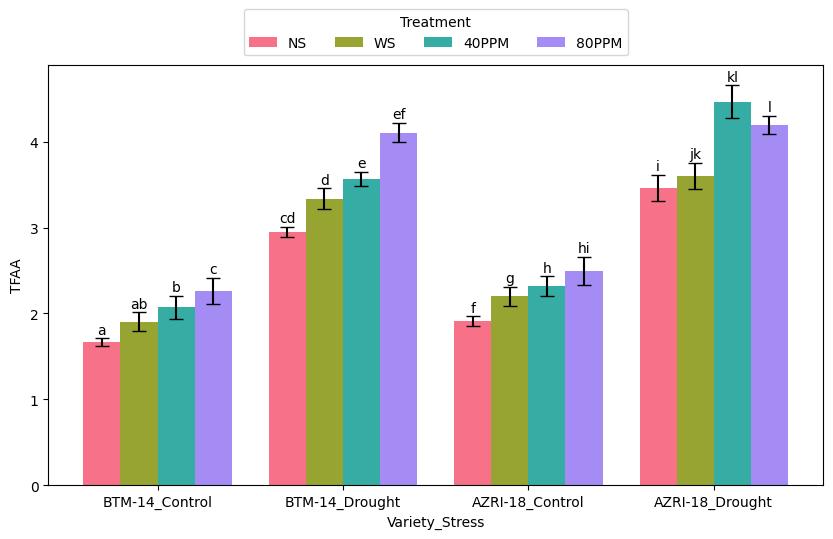

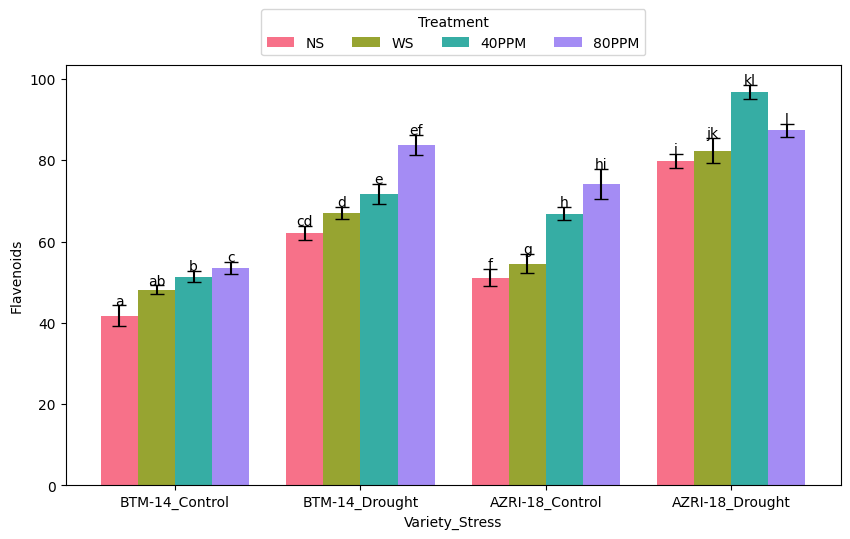

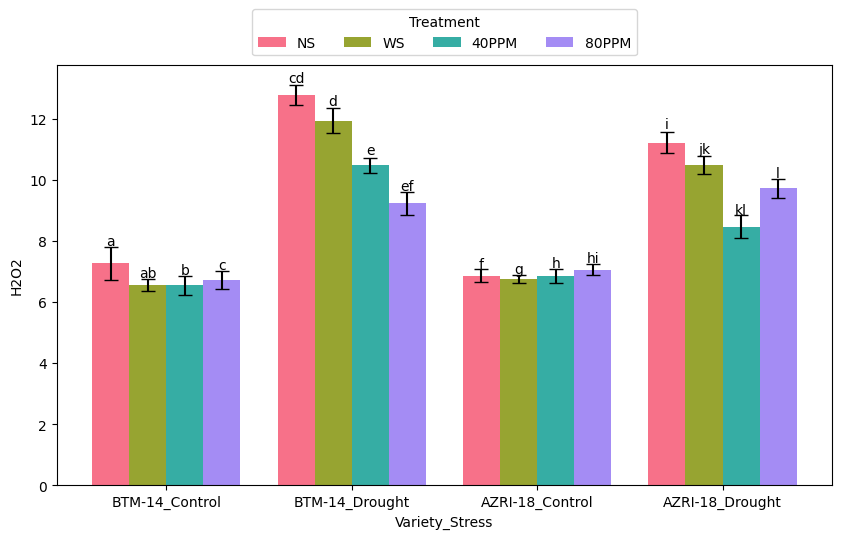

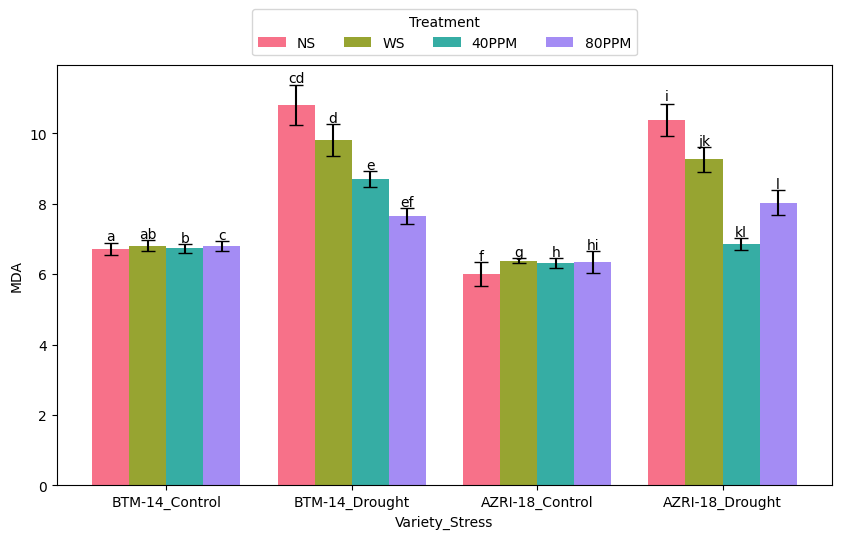

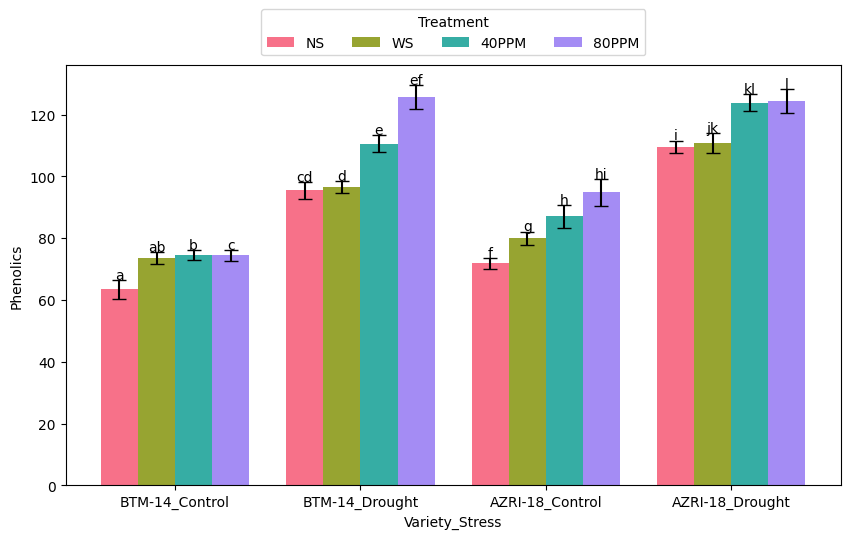

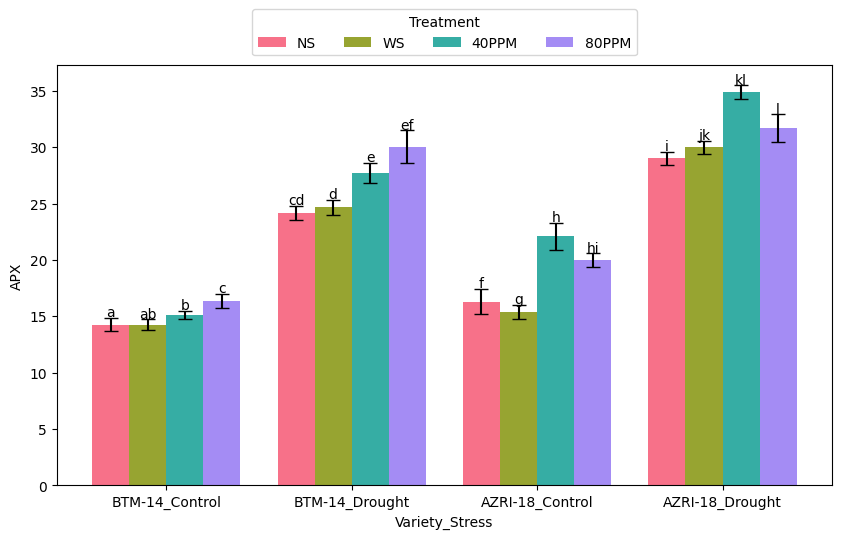

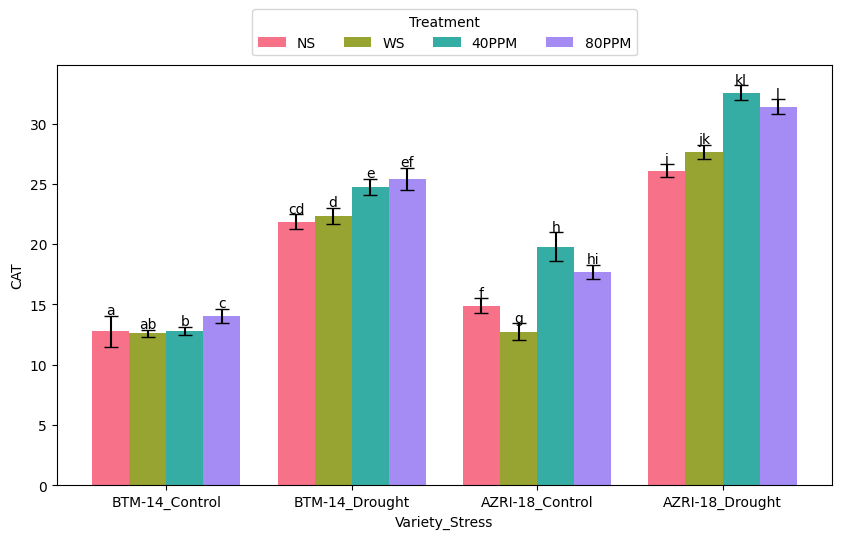

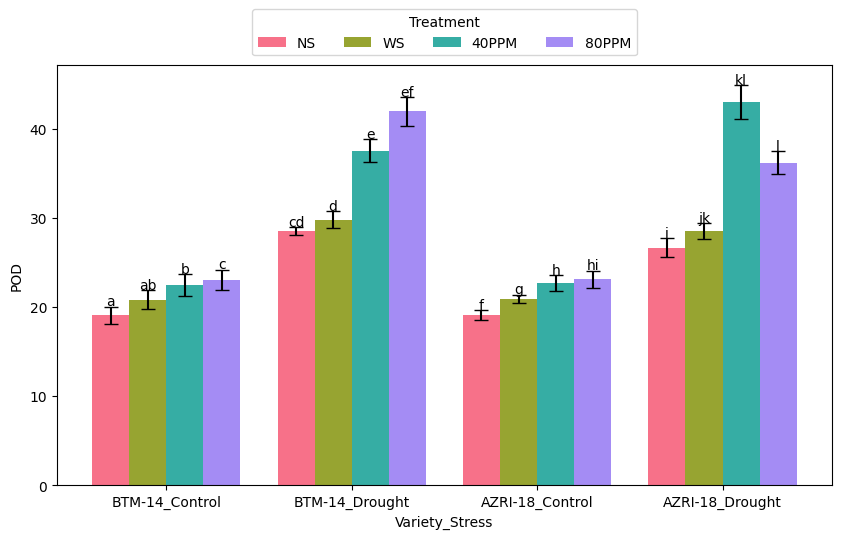

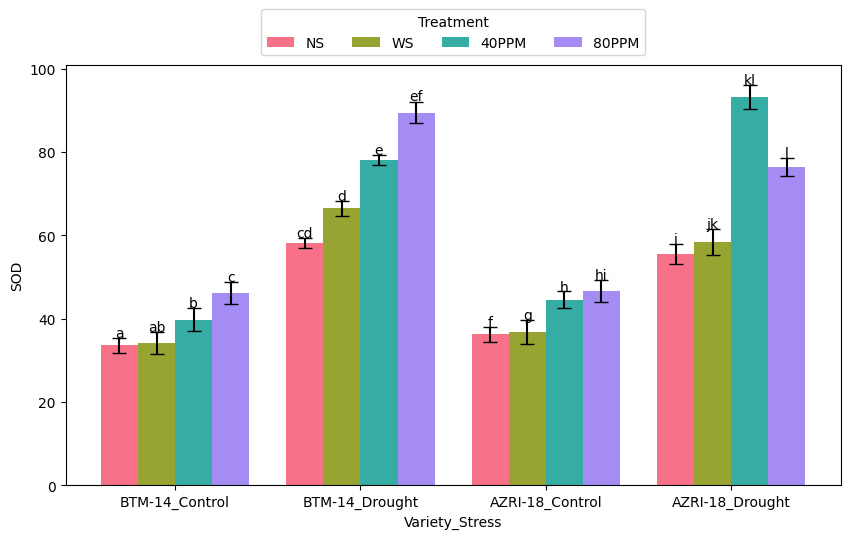

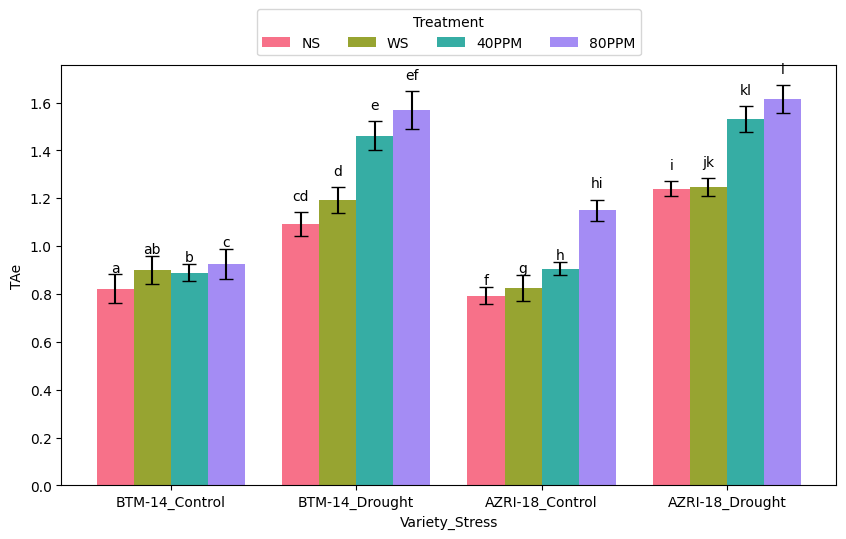

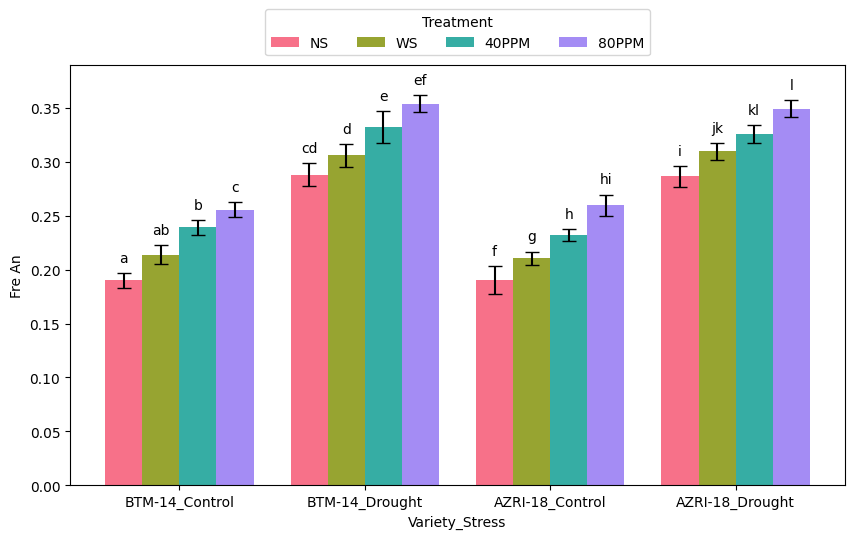

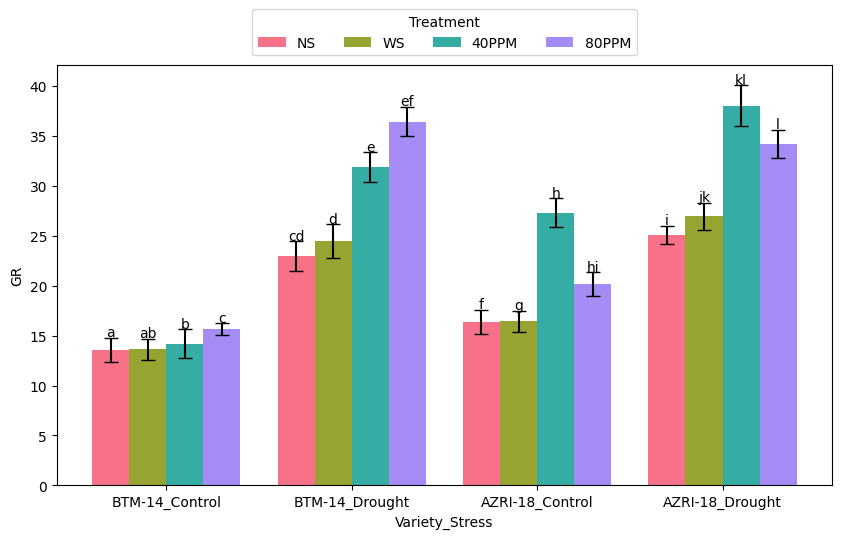

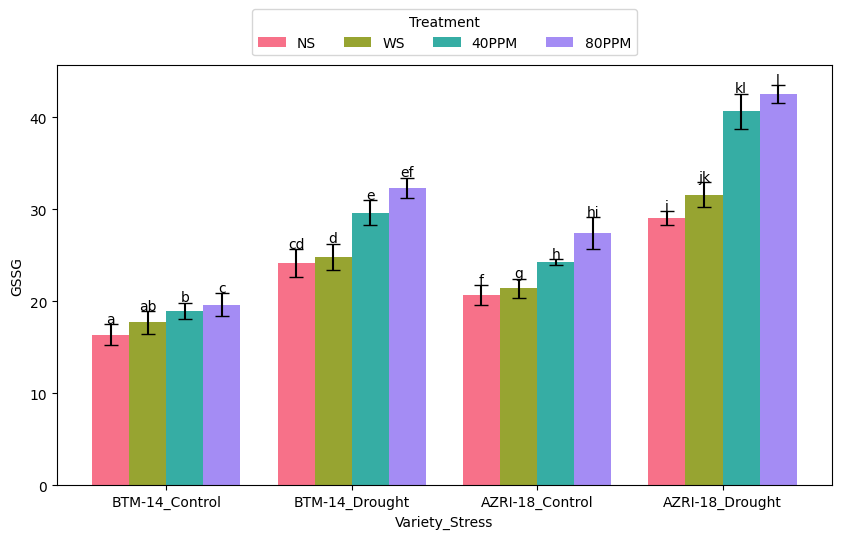

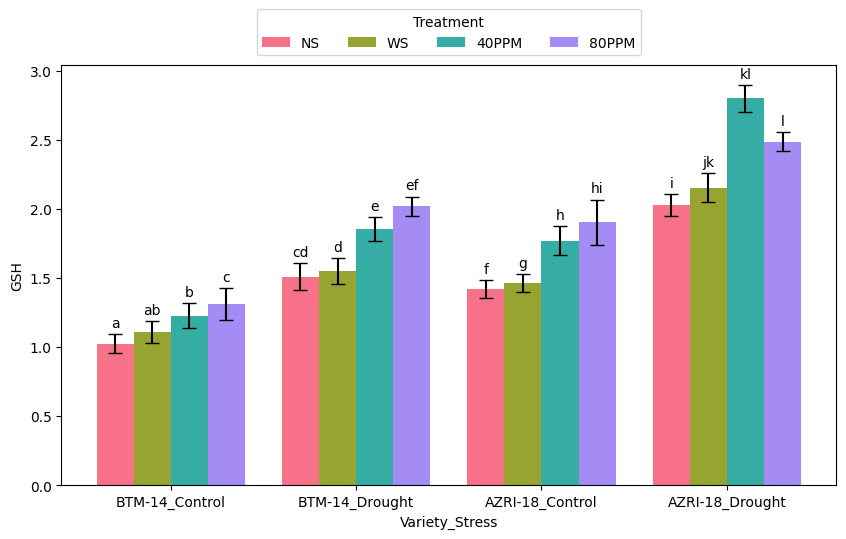

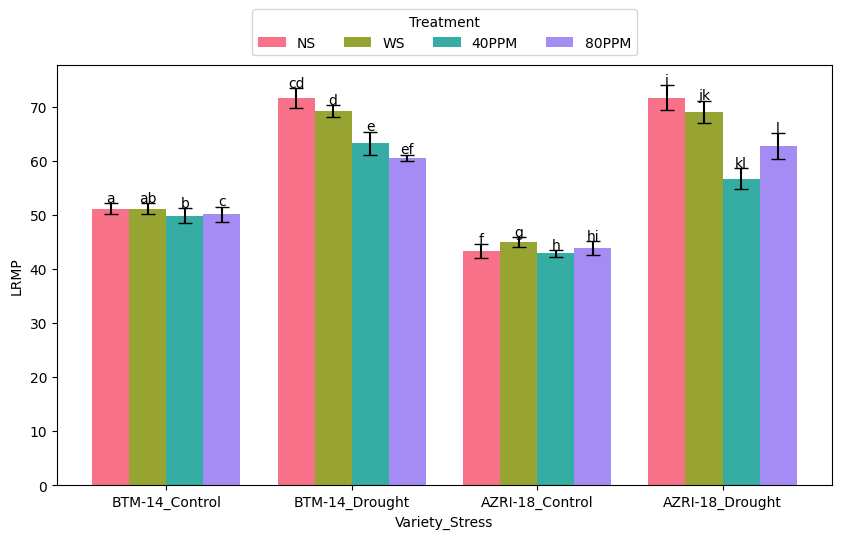

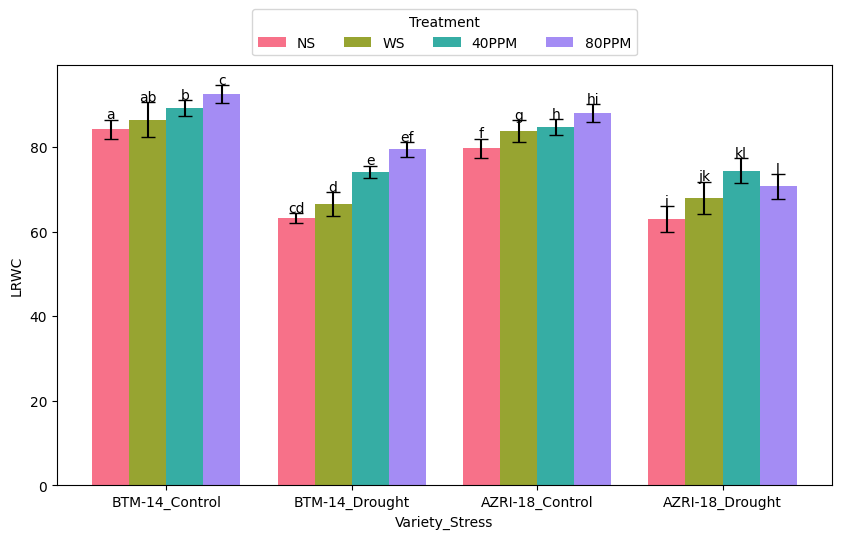

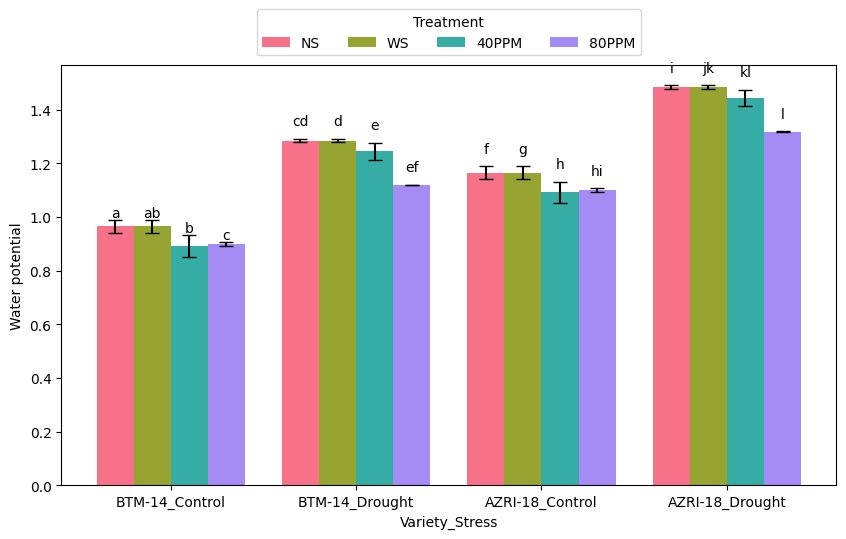

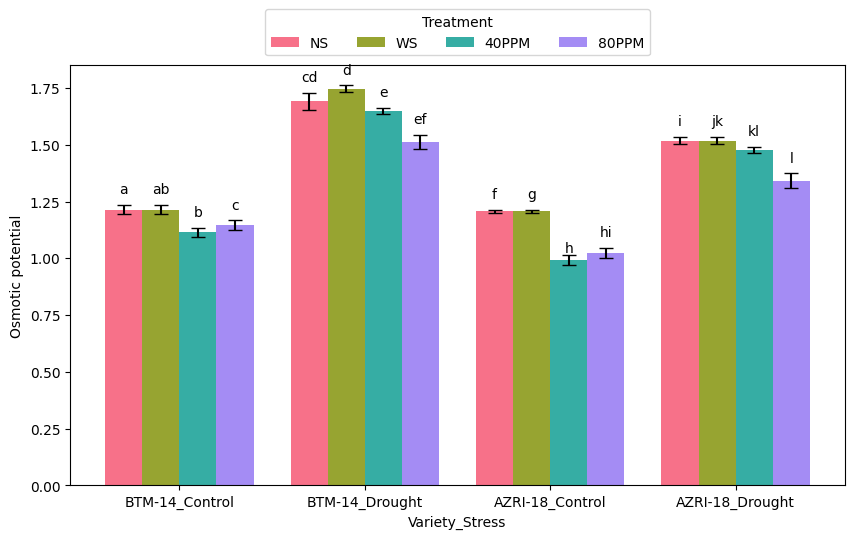

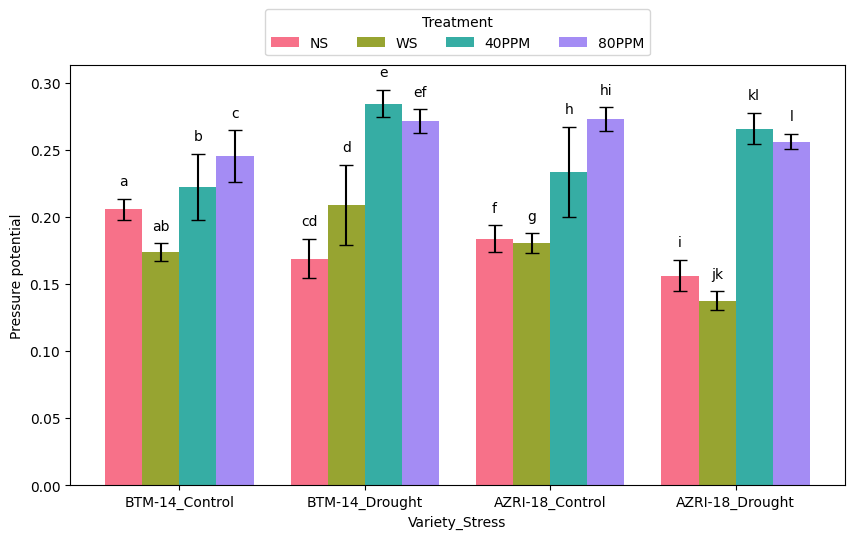

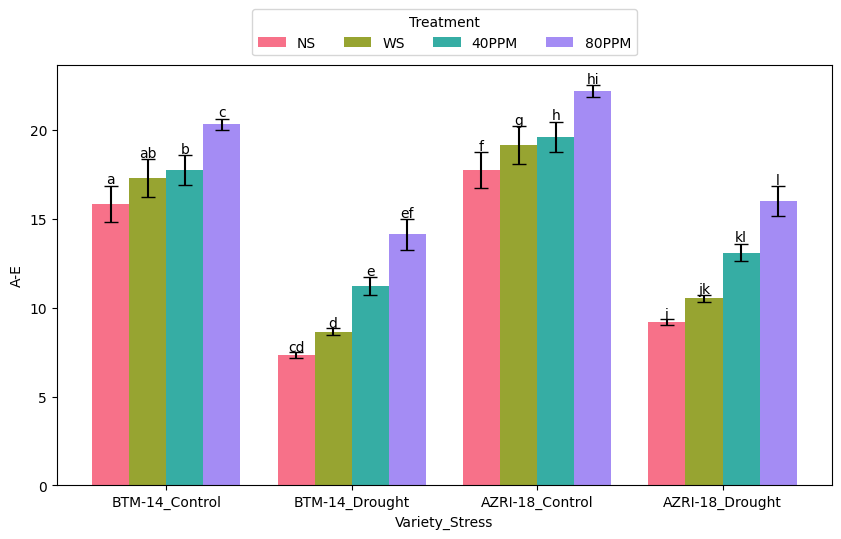

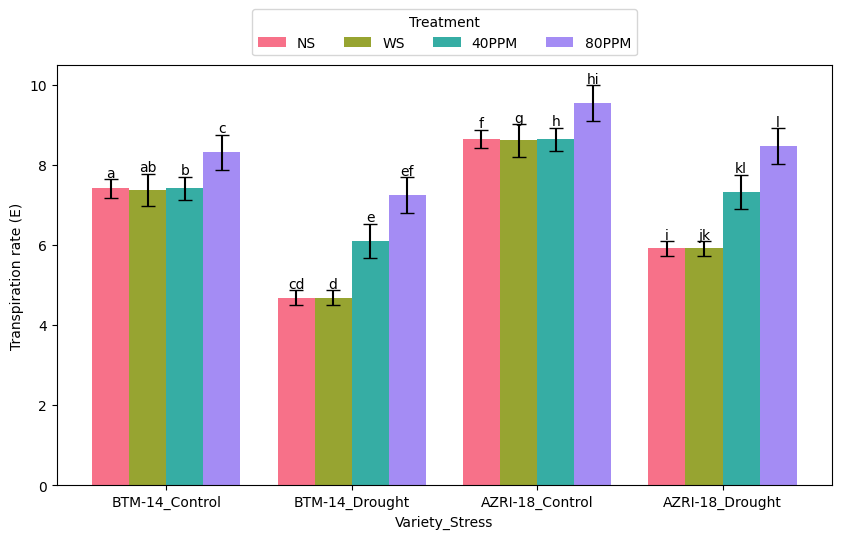

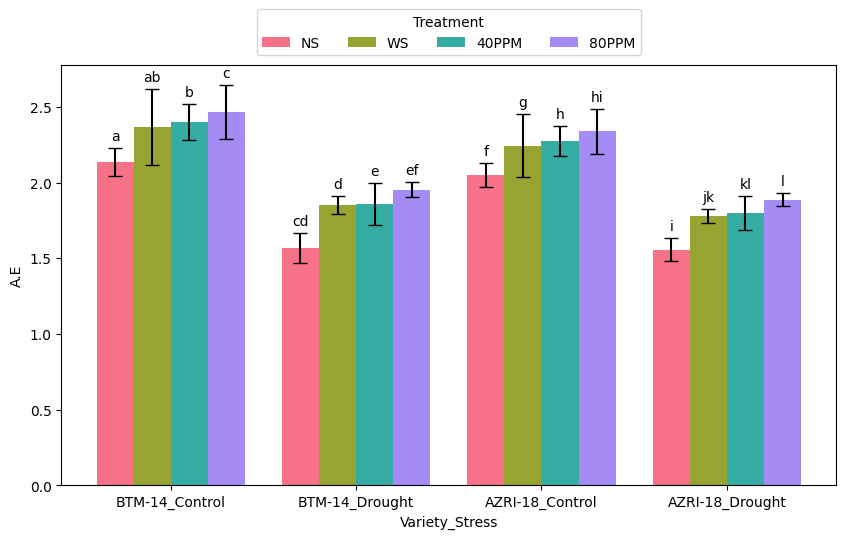

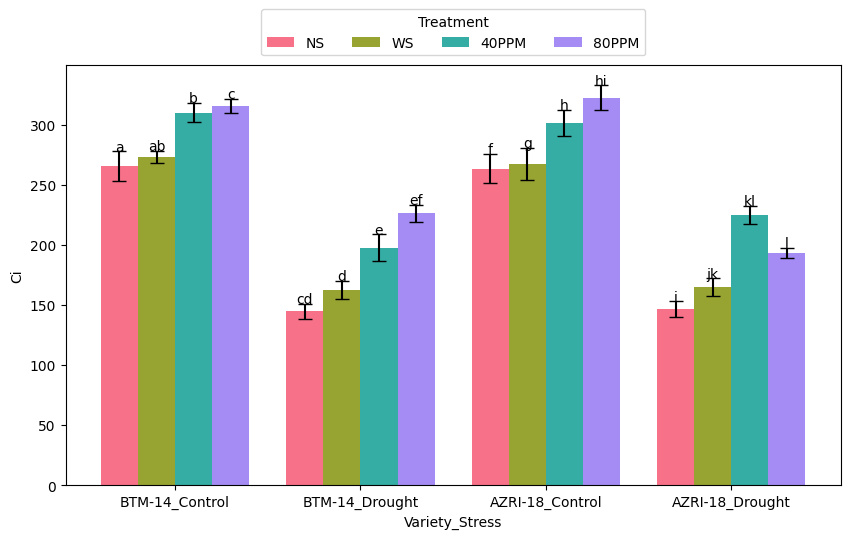

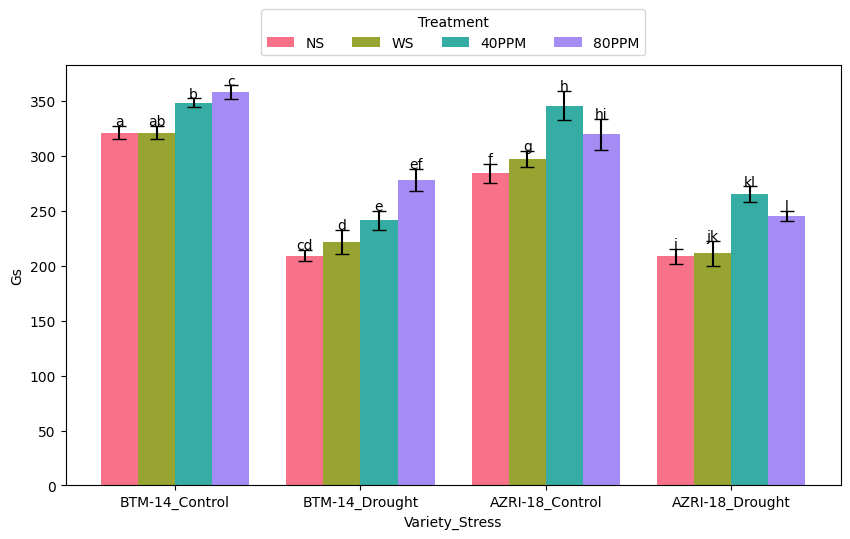

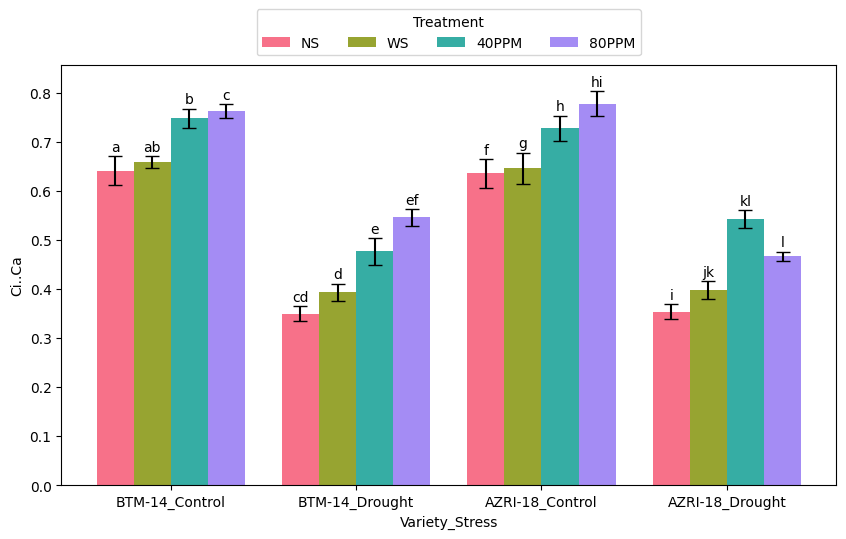

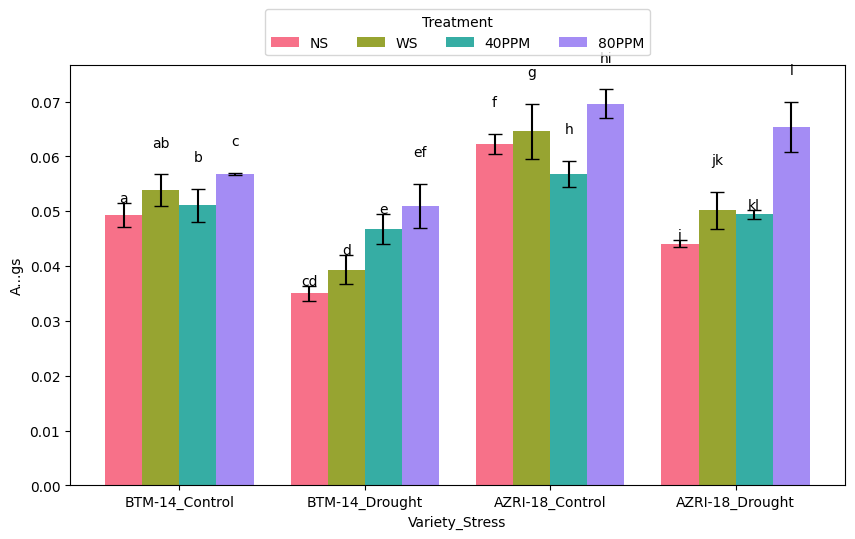

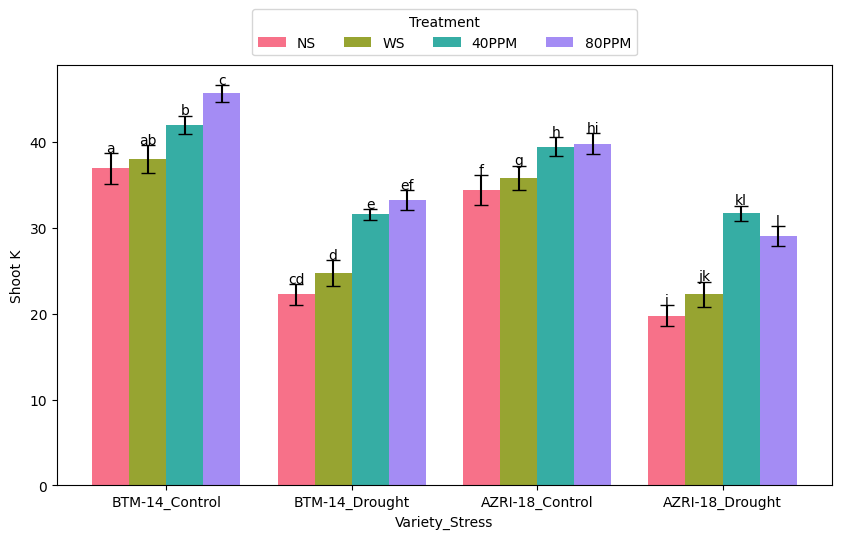

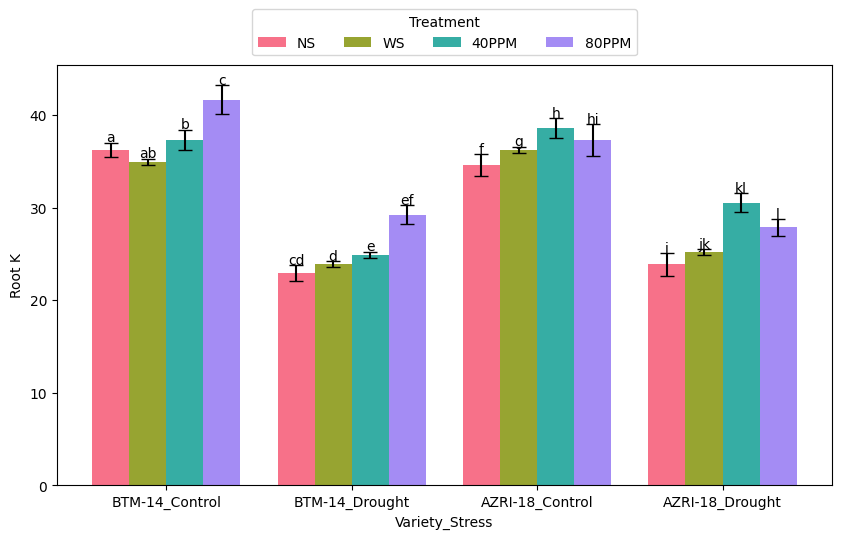

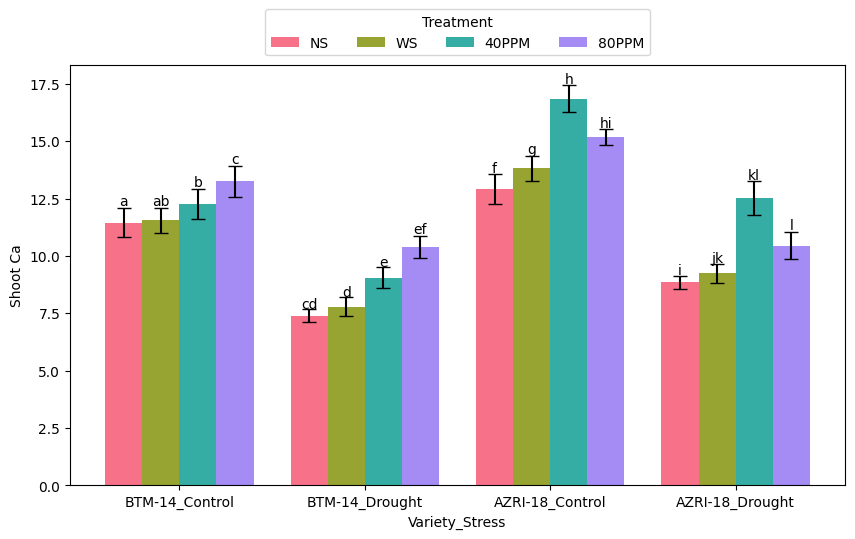

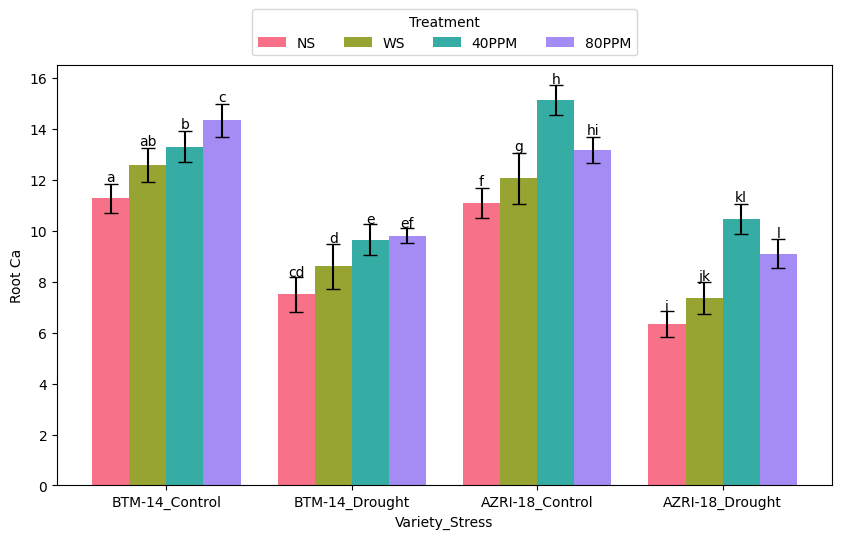

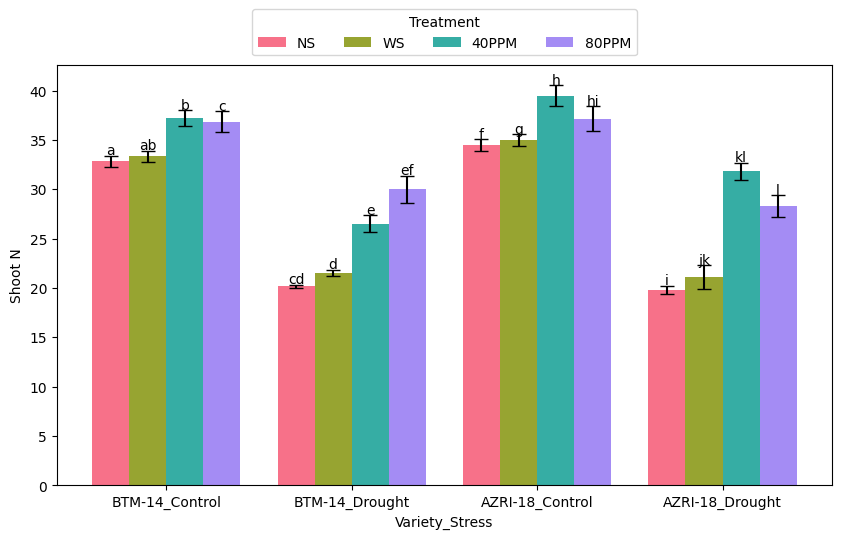

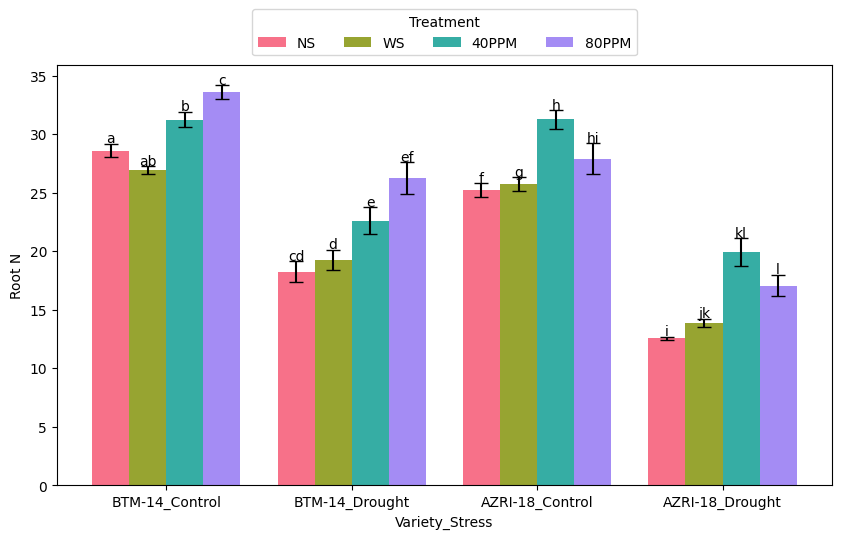

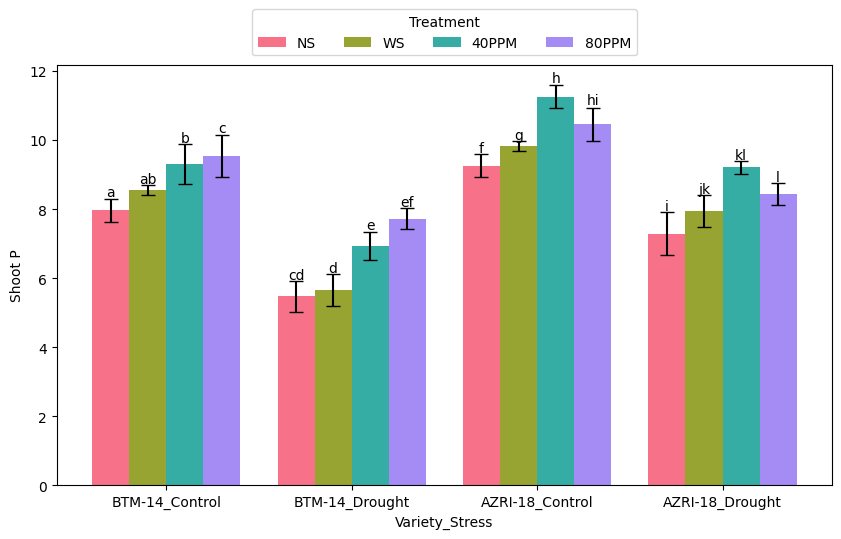

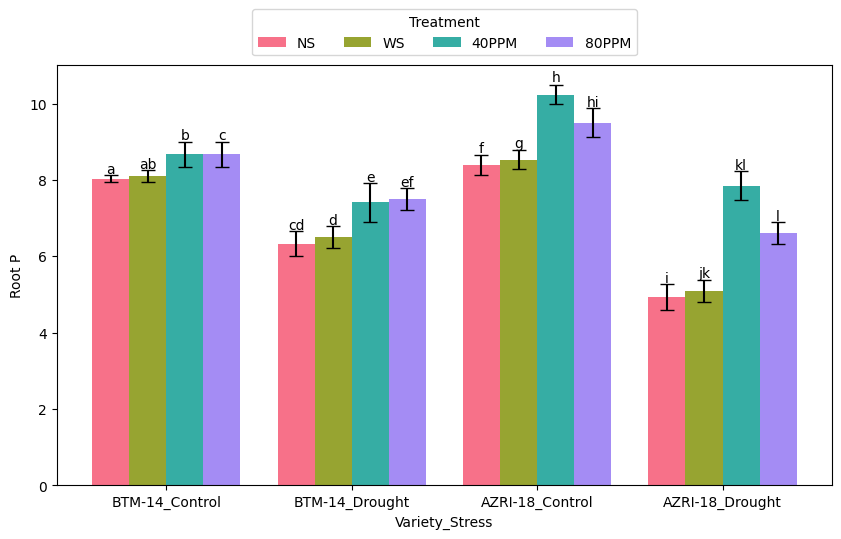

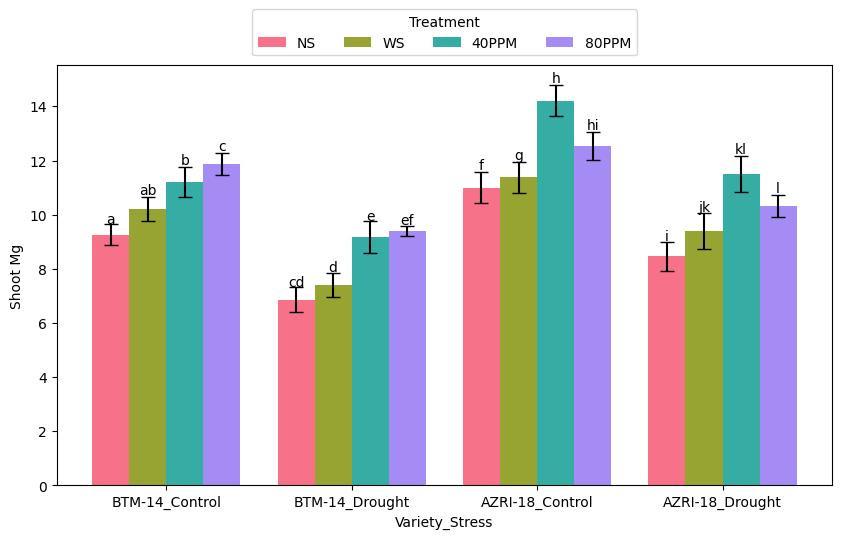

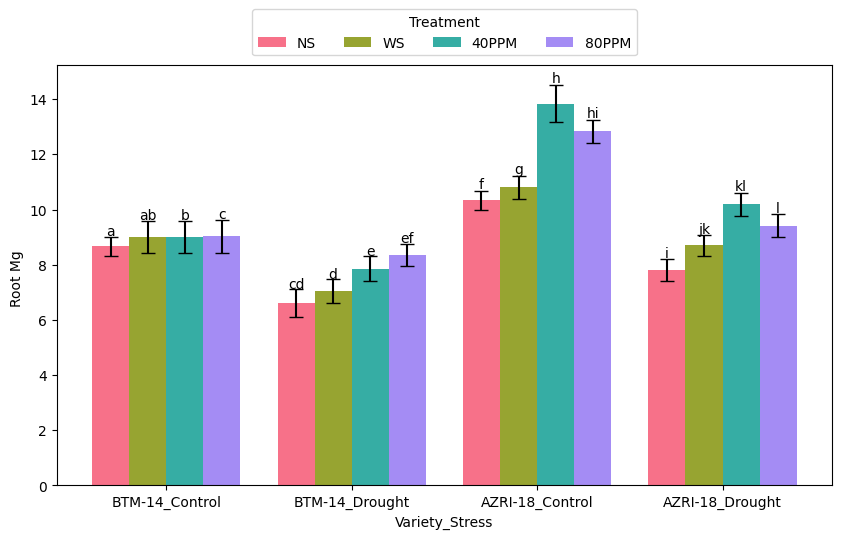

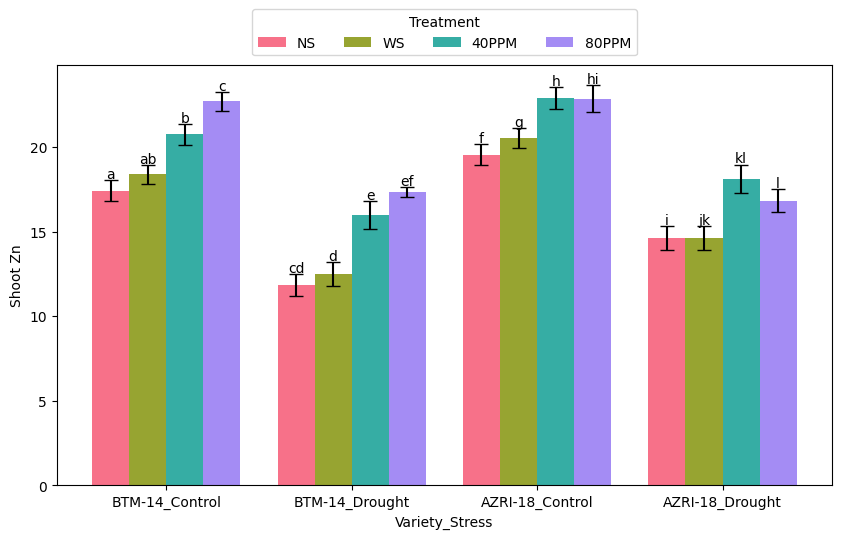

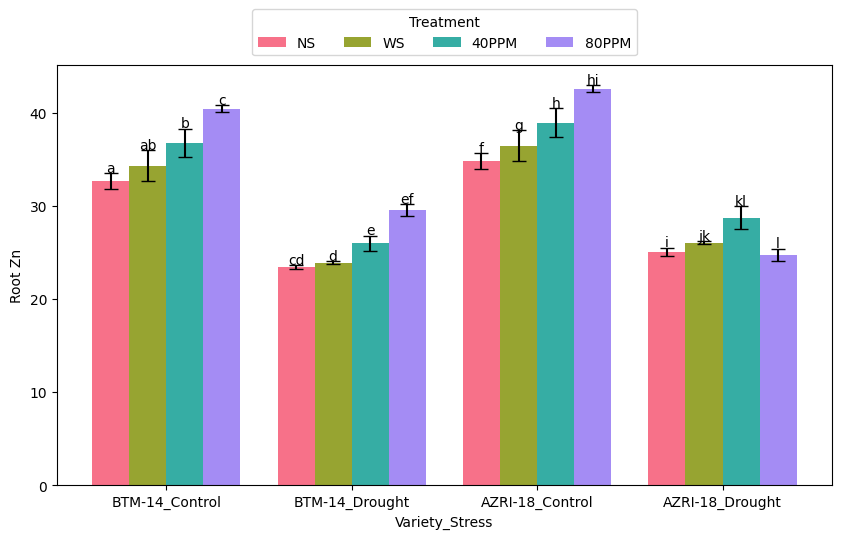

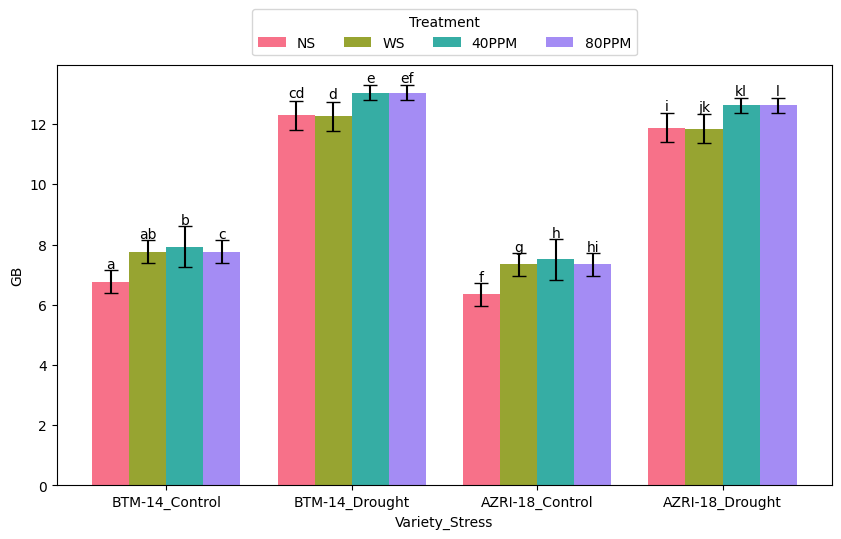

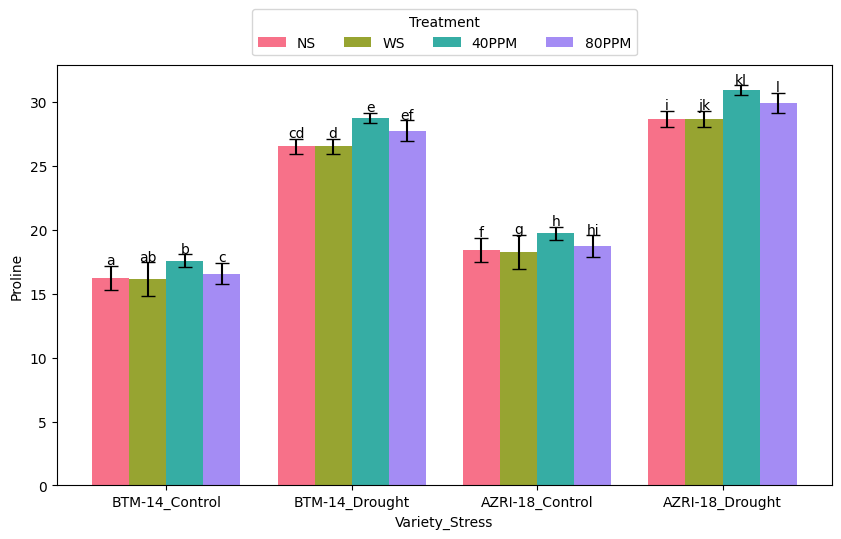

In [18]:
# Load the CSV file
df = pd.read_csv('./Book1.csv')

# Extract the categorical columns and the data columns
categories = df.iloc[:, :3]
data = df.iloc[:, 3:]

# Number of variables
num_vars = data.shape[1] // 3

# Define colors for treatments using a seaborn color palette
palette = sns.color_palette("husl", 4)  # Using the 'husl' palette with 4 colors
treatment_colors = {
    'NS': palette[0],
    'WS': palette[1],
    '40PPM': palette[2],
    '80PPM': palette[3]
}

# Default color for unspecified treatments
default_color = 'gray'

for i in range(num_vars):
    means = data.iloc[:, i*3]
    errors = data.iloc[:, i*3 + 1]
    letters = data.iloc[:, i*3 + 2]
    
    # Create a new figure for each variable
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create a combined category for x-axis
    combined_category = categories['variety'] + '_' + categories['stress']
    
    # Create a DataFrame for plotting
    plot_data = pd.DataFrame({
        'combined_category': combined_category,
        'means': means,
        'errors': errors,
        'letters': letters,
        'treatment': categories['treatment']
    })
    
    # Get unique combined categories and treatments
    unique_categories = plot_data['combined_category'].unique()
    unique_treatments = plot_data['treatment'].unique()
    
    # Set bar width and positions
    bar_width = 0.2
    x = np.arange(len(unique_categories))
    
    # Plot bars with colors based on treatments
    for j, treatment in enumerate(unique_treatments):
        treatment_data = plot_data[plot_data['treatment'] == treatment]
        positions = x + j * bar_width
        ax.bar(positions, treatment_data['means'], yerr=treatment_data['errors'], capsize=5, 
               color=treatment_colors.get(treatment, default_color), width=bar_width, label=treatment)
        for k, (pos, mean, error, letter) in enumerate(zip(positions, treatment_data['means'], 
                                                           treatment_data['errors'], treatment_data['letters'])):
            # Adjust the position of letters based on the mean value
            if mean < 0.01:
                ax.text(pos, mean + error + 0.0001, letter, ha='center')  # Adjusted position for values between 0 and 0.01
            elif mean < 0.05:
                ax.text(pos, mean + error + 0.0001, letter, ha='center')  # Adjusted position for values between 0.01 and 0.05
            elif mean < 0.1:
                ax.text(pos, mean + error + 0.005, letter, ha='center')  # Adjusted position for very small values
            elif mean < 1:
                ax.text(pos, mean + error + 0.01, letter, ha='center')  # Adjusted position for small values
            elif mean < 10:
                ax.text(pos, mean + error + 0.05, letter, ha='center')  # Adjusted position for values between 1 and 10
            elif mean < 50:
                ax.text(pos, mean + error + 0.1, letter, ha='center')  # Adjusted position for values between 10 and 50
            elif mean < 100:
                ax.text(pos, mean + error + 0.2, letter, ha='center')  # Adjusted position for values between 50 and 100
            elif mean < 200:
                ax.text(pos, mean + error + 0.3, letter, ha='center')  # Adjusted position for values between 100 and 200
            else:
                ax.text(pos, mean + error + 0.4, letter, ha='center')  # Adjusted position for values above 200
    
    # Remove the title
    # ax.set_title(f'Variable {i+1}')
    
    ax.set_xlabel('Variety_Stress')
    ax.set_ylabel(data.columns[i*3])  # Set y-axis label as the column name
    
    # Set x-ticks to the middle of the grouped bars
    ax.set_xticks(x + bar_width * (len(unique_treatments) - 1) / 2)
    ax.set_xticklabels(unique_categories, rotation=0)  # Set rotation to 0 for horizontal labels
    
    # Add legend above the plot
    ax.legend(title='Treatment', loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=len(unique_treatments))
    
    # Adjust layout to fit all elements
    plt.subplots_adjust(top=0.85, bottom=0.15)
    
    # Adjust y-axis limits if necessary
    if means.max() < 1:
        ax.set_ylim(0, 1.1 * means.max())
    
    # Save the figure with 300 DPI resolution
    # plt.savefig(f'./{data.columns[i*3]}.png', dpi=300)
    
    plt.show()

In [3]:
#  Load Data set
df = pd.read_csv('./Book1.csv')
# select categories and variables
categories = df.iloc[:, :3]
data = df.iloc[:, 3:]
print(categories)
print(data)

    variety   stress treatment
0    BTM-14  Control        NS
1    BTM-14  Control        WS
2    BTM-14  Control     40PPM
3    BTM-14  Control     80PPM
4    BTM-14  Drought        NS
5    BTM-14  Drought        WS
6    BTM-14  Drought     40PPM
7    BTM-14  Drought     80PPM
8   AZRI-18  Control        NS
9   AZRI-18  Control        WS
10  AZRI-18  Control     40PPM
11  AZRI-18  Control     80PPM
12  AZRI-18  Drought        NS
13  AZRI-18  Drought        WS
14  AZRI-18  Drought     40PPM
15  AZRI-18  Drought     80PPM
         SDW       S.E Letter         RL     S.E.1 Letter.1         SL  \
0   0.226667  0.008819      a  17.000000  0.577367        a  16.033333   
1   0.243333  0.008819     ab  18.000000  0.577367       ab  17.000000   
2   0.260000  0.005774      b  20.000000  0.577367        b  18.266667   
3   0.280000  0.005774      c  22.000000  0.577367        c  19.666667   
4   0.126667  0.008819     cd  12.000000  0.577367       cd   9.166667   
5   0.150000  0.005774      d

In [4]:
num_vars = data.shape[1] // 3
num_vars

54

In [5]:
# After deciding number of variables, lets decide which column is mean, error and label
for i in range(num_vars):
    means = data.iloc[:, i*3]
    errors = data.iloc[:, i*3 + 1]
    letters = data.iloc[:, i*3 + 2]
    print(means)
    print(errors)
    print(letters)

0     0.226667
1     0.243333
2     0.260000
3     0.280000
4     0.126667
5     0.150000
6     0.176667
7     0.200000
8     0.183333
9     0.203333
10    0.223333
11    0.240000
12    0.120000
13    0.136667
14    0.160000
15    0.170000
Name: SDW, dtype: float64
0     0.008819
1     0.008819
2     0.005774
3     0.005774
4     0.008819
5     0.005774
6     0.008819
7     0.005774
8     0.008819
9     0.008819
10    0.008819
11    0.005774
12    0.005774
13    0.008819
14    0.005774
15    0.005774
Name: S.E, dtype: float64
0      a
1     ab
2      b
3      c
4     cd
5      d
6      e
7     ef
8      f
9      g
10     h
11    hi
12     i
13    jk
14    kl
15     l
Name: Letter, dtype: object
0     17.000000
1     18.000000
2     20.000000
3     22.000000
4     12.000000
5     13.000000
6     14.000000
7     16.000000
8     16.000000
9     17.233333
10    19.000000
11    20.166667
12    10.666667
13    12.000000
14    13.500000
15    14.833333
Name: RL, dtype: float64
0     0.577367


In [11]:

# # Define color palettes
# Deep = sns.color_palette("deep")
# Muted = sns.color_palette("muted")
# Pastel = sns.color_palette("pastel")
# Bright = sns.color_palette("bright")
# Dark = sns.color_palette("dark")
# Colorblind = sns.color_palette("colorblind")
# Husl = sns.color_palette("husl")
# Hls = sns.color_palette("hls")
# Cubehelix = sns.color_palette("cubehelix")
# Paired = sns.color_palette("Paired")
# Set1 = sns.color_palette("Set1")
# Set2 = sns.color_palette("Set2")
# Set3 = sns.color_palette("Set3")
# Accent = sns.color_palette("Accent")
# Dark2 = sns.color_palette("Dark2")
# Spectral = sns.color_palette("Spectral")
# RdYlBu = sns.color_palette("RdYlBu")
# RdYlGn = sns.color_palette("RdYlGn")
# RdBu = sns.color_palette("RdBu")
# RdGy = sns.color_palette("RdGy")
# RdPu = sns.color_palette("RdPu")
# Blues = sns.color_palette("Blues")
# BuGn = sns.color_palette("BuGn")
# BuPu = sns.color_palette("BuPu")
# GnBu = sns.color_palette("GnBu")
# Greens = sns.color_palette("Greens")
# Greys = sns.color_palette("Greys")
# Oranges = sns.color_palette("Oranges")
# OrRd = sns.color_palette("OrRd")
# PuBu = sns.color_palette("PuBu")
# PuBuGn = sns.color_palette("PuBuGn")
# PuRd = sns.color_palette("PuRd")
# Purples = sns.color_palette("Purples")
# YlGn = sns.color_palette("YlGn")
# YlGnBu = sns.color_palette("YlGnBu")
# YlOrBr = sns.color_palette("YlOrBr")
# YlOrRd = sns.color_palette("YlOrRd")
# YlOrRd

[(0.9994925028835063, 0.9192618223760093, 0.6061361014994233),
 (0.996078431372549, 0.8065974625144174, 0.41494809688581313),
 (0.9944329104190696, 0.6371549404075355, 0.2717108804306036),
 (0.9898808150711266, 0.40955017301038066, 0.19432525951557092),
 (0.9186466743560169, 0.16113802383698578, 0.1257362552864283),
 (0.7604613610149943, 0.013194925028835056, 0.14394463667820068)]

In [6]:
# Define colors for treatments using a seaborn color palette
palette = sns.color_palette("YlOrRd", 4)  # Using the 'husl' palette with 4 colors
treatment_colors = {
    'NS': palette[0],
    'WS': palette[1],
    '40PPM': palette[2],
    '80PPM': palette[3]
}

# Default color for unspecified treatments
default_color = 'gray'
treatment_colors

{'NS': (0.9976470588235294, 0.8823529411764706, 0.5286274509803922),
 'WS': (0.9952941176470589, 0.6690196078431372, 0.28549019607843135),
 '40PPM': (0.9890196078431372, 0.35529411764705887, 0.17882352941176471),
 '80PPM': (0.8305882352941176, 0.06117647058823529, 0.12549019607843137)}

In [ ]:
# create plot for each variable
fig, ax = plt.subplots(figsize=(10,6))
# Combine the two categories you want on X
combined_category= categories['variety'] + "-" + categories['stress']

In [14]:
# make data set
plot_data = pd.DataFrame({
    'combined_categories': combined_category,
    'means': means,
    'errors': errors,
    'letters': letters,
    'treatment': categories['treatment']
})

# get unique values of treatments and categories
unique_categories = plot_data['combined_categories'].unique()
unique_treatments = plot_data['treatment'].unique()
unique_treatments

array(['NS', 'WS', '40PPM', '80PPM'], dtype=object)